# INTRODUCTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import datetime as dt

import scipy.stats as st
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from scipy.stats import kruskal
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import re
import missingno as msno
from tqdm import tqdm

import locale
import os #intéragir avec le système d'exploitation
import zipfile #lecture et écriture pour les fichiers zip
import urllib #gestion des url
import sqlite3
import sys
import os
# Obtenir le répertoire de travail courant (répertoire du notebook)
current_dir = os.getcwd()

# Chemin relatif vers le répertoire contenant fonctions.py
relative_path = 'Openclassrooms'

# Chemin absolu vers le répertoire contenant fonctions.py
absolute_path = os.path.join(current_dir, relative_path)

# Insérer le chemin relatif dans sys.path
sys.path.insert(1, absolute_path)

# Importer les fonctions depuis fonctions.py
from fonctions import data_information, doublons

## Importation

In [2]:
# Connect to the SQLite database
connection = sqlite3.connect("olist.db")

# Get the names of all tables in the database
table_query = "SELECT name FROM sqlite_master WHERE type='table';"
table_names = connection.execute(table_query).fetchall()

# Dictionary to store DataFrames
dataframes = {}

# Iterate over the tables
for table_name in [name[0] for name in table_names]:
    print(f"Table: {table_name}")
    
    # Execute a query to select all rows from the current table
    query = f"SELECT * FROM {table_name};"
    
    # Create a DataFrame for the current table
    df = pd.read_sql_query(query, connection)
    
    # Store the DataFrame in the dictionary
    dataframes[table_name] = df
    

# Close the connection
connection.close()

print('________')

# Access the DataFrames using their respective table names
for table_name, df in dataframes.items():
    display(f"Table: {table_name}")
    display(df.head())
    print("\n")
    globals()[table_name] = df
    


Table: customers
Table: geoloc
Table: order_items
Table: order_pymts
Table: order_reviews
Table: orders
Table: products
Table: sellers
Table: translation
________


'Table: customers'

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


'Table: geoloc'

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,2,1046,-23.546129,-46.642951,sao paulo,SP
3,3,1041,-23.544392,-46.639499,sao paulo,SP
4,4,1035,-23.541578,-46.641607,sao paulo,SP


'Table: order_items'

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


'Table: order_pymts'

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


'Table: order_reviews'

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


'Table: orders'

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


'Table: products'

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


'Table: sellers'

,index,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


'Table: translation'

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


# ANALYSE EXPLORATOIRE

## Analyse des tables

In [3]:
for table_name, df in dataframes.items():
    print(f"Table: {table_name}")
    data_information(df)
    doublons(df)
    print("\n")

Table: customers
Nombre de ligne : 99441 Nombre de colonne : 6
------
Types des variables :
object    4
int64     2
dtype: int64
------
% de valeurs manquantes par colonne : 


index                       0.0
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

Il n'y a pas de doublons 


Table: geoloc
Nombre de ligne : 1000163 Nombre de colonne : 6
------
Types des variables :
int64      2
float64    2
object     2
dtype: int64
------
% de valeurs manquantes par colonne : 


index                          0.0
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

Il n'y a pas de doublons 


Table: order_items
Nombre de ligne : 112650 Nombre de colonne : 8
------
Types des variables :
object     4
int64      2
float64    2
dtype: int64
------
% de valeurs manquantes par colonne : 


index                  0.0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

Il n'y a pas de doublons 


Table: order_pymts
Nombre de ligne : 103886 Nombre de colonne : 6
------
Types des variables :
int64      3
object     2
float64    1
dtype: int64
------
% de valeurs manquantes par colonne : 


index                   0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

Il n'y a pas de doublons 


Table: order_reviews
Nombre de ligne : 99224 Nombre de colonne : 8
------
Types des variables :
object    6
int64     2
dtype: int64
------
% de valeurs manquantes par colonne : 


review_comment_title       0.883415
review_comment_message     0.587025
index                      0.000000
review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

Il n'y a pas de doublons 


Table: orders
Nombre de ligne : 99441 Nombre de colonne : 9
------
Types des variables :
object    8
int64     1
dtype: int64
------
% de valeurs manquantes par colonne : 


order_delivered_customer_date    0.029817
order_delivered_carrier_date     0.017930
order_approved_at                0.001609
index                            0.000000
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64

Il n'y a pas de doublons 


Table: products
Nombre de ligne : 32951 Nombre de colonne : 10
------
Types des variables :
float64    7
object     2
int64      1
dtype: int64
------
% de valeurs manquantes par colonne : 


product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
index                         0.000000
product_id                    0.000000
dtype: float64

Il n'y a pas de doublons 


Table: sellers
Nombre de ligne : 3095 Nombre de colonne : 5
------
Types des variables :
object    3
int64     2
dtype: int64
------
% de valeurs manquantes par colonne : 


index                     0.0
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

Il n'y a pas de doublons 


Table: translation
Nombre de ligne : 71 Nombre de colonne : 3
------
Types des variables :
object    2
int64     1
dtype: int64
------
% de valeurs manquantes par colonne : 


index                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

Il n'y a pas de doublons 




**Schémas des relations entre les tables**

![Texte alternatif](Tables.png)

### Customers

L'objectif étant de segmenter les clients on va dans un premier temps regarder le dataframe 'customers'

On voit que chaque client est représenté par un 'unique_id' et que l'on a des informations de localisations.

In [4]:
display(customers.head())

,index,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
print('Nombre de client', customers['customer_id'].nunique())
print('Nombre de client unique', customers['customer_unique_id'].nunique())

Nombre de client 99441
Nombre de client unique 96096


On va regarder plus en détail les informations de localisation qui sont un indicateur important dans la segmentation.

In [6]:
for i in customers.columns : 
    print(i)
    print(len(customers[i].unique()))
    print(customers[i].dtypes)
    print("___")

index
99441
int64
___
customer_id
99441
object
___
customer_unique_id
96096
object
___
customer_zip_code_prefix
14994
int64
___
customer_city
4119
object
___
customer_state
27
object
___


In [7]:
display(customers['customer_city'].head(20))

0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
5            jaragua do sul
6                 sao paulo
7                   timoteo
8                  curitiba
9            belo horizonte
10            montes claros
11           rio de janeiro
12         lencois paulista
13                sao paulo
14            caxias do sul
15               piracicaba
16           rio de janeiro
17                guarulhos
18                sao paulo
19                   pacaja
Name: customer_city, dtype: object

En regardant les 20 premières villes on ne remarque pas, pour le moment, d'erreur lexicale.

## Sélection des variables

Parmi les dataframes de la base de donnée on ne gardera pas ceux qui ne sont pas pertinents pour notre problématique : 
-  geoloc
-  sellers
-  translation

Puis on va créer des sous df de chaque table avec uniquement les colonnes qui sont pertinentes pour segmenter les clients.

In [8]:
customers_reduit = customers.drop(['index', 'customer_city', 'customer_zip_code_prefix'], axis=1)
customers_reduit.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


In [9]:
order_items_reduit = order_items.drop(['index', 'order_item_id', 'seller_id', 'freight_value', 'shipping_limit_date'], axis=1)
display(order_items_reduit.head())

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


In [10]:
order_pymts_reduit = order_pymts.drop(['index', 'payment_sequential', 'payment_installments'], axis=1)
display(order_pymts_reduit.head())

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


In [11]:
display(order_reviews.head())

,index,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [12]:
order_reviews_reduit = order_reviews[['order_id', 'review_score']]
display(order_reviews_reduit.head())

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [13]:
display(orders.head())

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders_reduit = orders[['order_id', 'customer_id', 'order_status', 'order_approved_at',
                        'order_delivered_customer_date']]
display(orders_reduit.head())

,order_id,customer_id,order_status,order_approved_at,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02


In [15]:
display(products.head())

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [16]:
products_reduit = products[['product_id','product_category_name','product_photos_qty','product_description_lenght']]
display(products_reduit.head())

,product_id,product_category_name,product_photos_qty,product_description_lenght
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,287.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,276.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,250.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,261.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,402.0


On va rassembler les sous dataframe que l'on vient de créer en 1 seul dataframe.

In [17]:
data_customers = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(order_items_reduit, order_pymts_reduit, 
                            on='order_id', how='inner'), order_reviews_reduit, on='order_id', how='inner'), 
                          orders_reduit, on='order_id', how='inner'),
                          products_reduit, on='product_id', how='inner'),
                          customers_reduit, on='customer_id', how='inner')
display(data_customers.head())

,order_id,product_id,price,payment_type,payment_value,review_score,customer_id,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48,cool_stuff,4.0,598.0,871766c5855e863f6eccc05f988b23cb,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,boleto,73.86,5,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-29 02:44:11,2017-07-13 20:39:29,cool_stuff,4.0,598.0,0fb8e3eab2d3e79d92bb3fffbb97f188,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,credit_card,83.23,4,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 12:31:43,2018-06-04 18:34:26,cool_stuff,4.0,598.0,3419052c8c6b45daf79c1e426f9e9bcb,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,75.07,5,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:55:08,2017-08-09 21:26:33,cool_stuff,4.0,598.0,e7c828d22c0682c1565252deefbe334d,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 22:05:11,2017-08-24 20:04:21,cool_stuff,4.0,598.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,MG


In [18]:
# Suppression de customer_id
data_customers = data_customers.drop('customer_id', axis=1)

## Compréhension variables

Prenons par exemple le client n°9a736b248f67d166d2fbb006bcb877c3.

Il y a 75 lignes référencées ce qui correspond à :
- order_id                          2
- product_id                        3
- price                             3
- payment_type                      1
- payment_value                    14
- review_score                      1
- order_status                      1
- order_approved_at                 2
- order_delivered_customer_date     2
- customer_unique_id                1
- customer_state                    1

Soit 2 commandes avec 3 produits différents et 14 paiements. On peut en déduire que chaque ligne correspond à 1 quantité de produit pour chaque commande. Si le client a prit 3 fois le même produit il y aura 3 lignes. 

In [19]:
# Compréhension des variables
display(data_customers[['customer_unique_id', 'order_id']].value_counts().head())
x=data_customers.loc[data_customers['customer_unique_id']=='9a736b248f67d166d2fbb006bcb877c3']
print(x.nunique())

customer_unique_id                order_id                        
9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c    63
6fbc7cdadbb522125f4b27ae9dee4060  fedcd9f7ccdc8cba3a18defedd1a5547    38
8af7ac63b2efbcbd88e5b11505e8098a  fa65dad1b0e818e3ccc5cb0e39231352    29
569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13    26
5419a7c9b86a43d8140e2939cd2c2f7e  a3725dfe487d359b5be08cac48b64ec5    24
dtype: int64

order_id                          2
product_id                        3
price                             3
payment_type                      1
payment_value                    14
review_score                      1
order_status                      1
order_approved_at                 2
order_delivered_customer_date     2
product_category_name             3
product_photos_qty                3
product_description_lenght        3
customer_unique_id                1
customer_state                    1
dtype: int64


In [20]:
correlation_matrix = data_customers.corr()
display(correlation_matrix)

/var/folders/sg/93kbc44x3dz8s65w44mhwm100000gn/T/ipykernel_13537/3802337335.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_customers.corr()


,price,payment_value,review_score,product_photos_qty,product_description_lenght
price,1.000000,0.741433,-0.004515,0.052378,0.201950
payment_value,0.741433,1.000000,-0.082404,0.009833,0.156257
review_score,-0.004515,-0.082404,1.000000,0.022266,0.010354
product_photos_qty,0.052378,0.009833,0.022266,1.000000,0.117374
product_description_lenght,0.201950,0.156257,0.010354,0.117374,1.000000


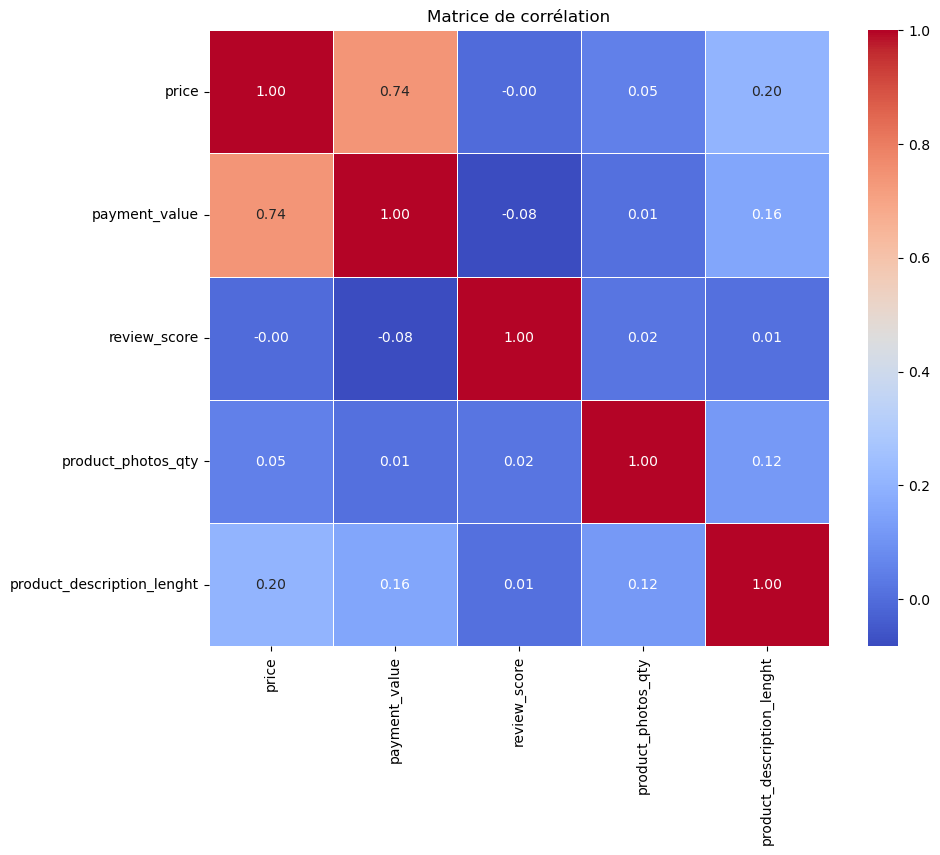

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation")
plt.show()

## Filtrage des clients

Pour sélectionner les clients qui ont passé plusieurs commandes on va filtrer les variables **customers_unique_id** (qui représente l'id unique par client, contrairement au customers_id dont chaque client peut en avoir plusieurs) et **order_id** (qui correspond à l'id de chaque commande). 

In [22]:
print(data_customers[['customer_unique_id', 'order_id']].nunique())
temp=data_customers.groupby('customer_unique_id').agg({'order_id':'nunique'}).sort_values(
    by = 'order_id', ascending=False)
display(temp.reset_index().head())
data_cust_temp=temp[temp['order_id']>1].reset_index()
display(data_cust_temp.head())


counts = data_customers.groupby('customer_unique_id').agg({'order_id':'nunique'}).reset_index()
loyal_customers = data_customers[data_customers['customer_unique_id'].isin(data_cust_temp['customer_unique_id'])]

total_customers = counts.shape[0]
loyal_customers_count = loyal_customers['customer_unique_id'].nunique()
percentage_loyal_customers = round((loyal_customers_count / total_customers) * 100)

print('Nombre de client total:', total_customers)
print('Nombre de client ayant passé plus d\'une commande:', loyal_customers_count)
print('Pourcentage de client ayant passé plus d\'une commande:', percentage_loyal_customers, '%')

customer_unique_id    94720
order_id              97916
dtype: int64


,customer_unique_id,order_id
0,8d50f5eadf50201ccdcedfb9e2ac8455,16
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7


,customer_unique_id,order_id
0,8d50f5eadf50201ccdcedfb9e2ac8455,16
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7


Nombre de client total: 94720
Nombre de client ayant passé plus d'une commande: 2869
Pourcentage de client ayant passé plus d'une commande: 3 %


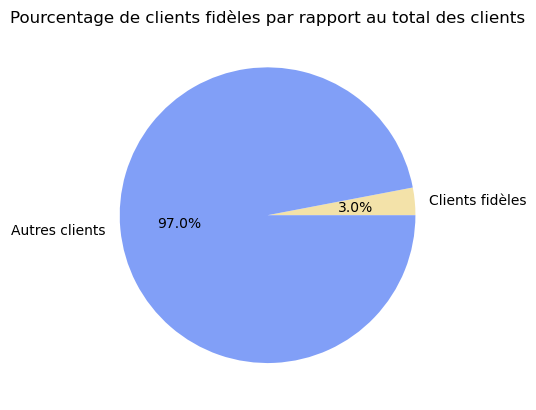

In [23]:
# Graphique
labels = ['Clients fidèles', 'Autres clients']
sizes = [percentage_loyal_customers, 100-percentage_loyal_customers]
colors = ['#F3E2A9', '#819FF7']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Pourcentage de clients fidèles par rapport au total des clients')
plt.show()

In [24]:
display(data_customers.loc[data_customers['customer_unique_id']=='0000366f3b9a7992bf8c76cfdf3221e2'])

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state
19870,e22acc9c116caa3f2b7121bbb380d08e,372645c7439f9661fbbacfd129aa92ec,129.9,credit_card,141.9,5,delivered,2018-05-10 11:11:18,2018-05-16 20:48:37,cama_mesa_banho,1.0,236.0,0000366f3b9a7992bf8c76cfdf3221e2,SP


In [25]:
data_customers_count=data_customers.groupby('customer_unique_id').agg({'order_id': 'count'})
display(data_customers_count.sort_values(by='order_id', ascending=True).head())

,order_id
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
a38552966e7362a10e7577dc3ab70ae5,1
a3828c34de1c8c4f3b1aada67bcb84ec,1
a3817cda4092a23de8f8b1cabcfb43f3,1
a3805e7cc6bf9c7dc7589fc59ce0a1b6,1


In [26]:
display(data_customers.describe(include='all'))

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state
count,117329,117329,117329.000000,117329,117329.000000,117329.000000,117329,117314,114858,115634,115634.000000,115634.000000,117329,117329
unique,97916,32789,NaN,4,NaN,NaN,7,89533,95021,73,NaN,NaN,94720,27
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,credit_card,NaN,NaN,delivered,2017-08-08 20:43:31,2017-08-14 12:46:18,cama_mesa_banho,NaN,NaN,9a736b248f67d166d2fbb006bcb877c3,SP
freq,63,533,NaN,86520,NaN,NaN,114859,63,63,11847,NaN,NaN,75,49527
mean,NaN,NaN,120.524349,NaN,172.062565,4.031467,NaN,NaN,NaN,NaN,2.205528,785.802861,NaN,NaN
std,NaN,NaN,182.944843,NaN,265.388194,1.387927,NaN,NaN,NaN,NaN,1.717783,652.382965,NaN,NaN
min,NaN,NaN,0.850000,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,4.000000,NaN,NaN
25%,NaN,NaN,39.900000,NaN,60.750000,4.000000,NaN,NaN,NaN,NaN,1.000000,346.000000,NaN,NaN
50%,NaN,NaN,74.900000,NaN,108.100000,5.000000,NaN,NaN,NaN,NaN,1.000000,600.000000,NaN,NaN
75%,NaN,NaN,134.900000,NaN,189.060000,5.000000,NaN,NaN,NaN,NaN,3.000000,983.000000,NaN,NaN


**COMMENTAIRE**

**Review score** est une note concernant que le client met à la commande, elle va de 1 à 5.

**Payment value** correspond au total de la commande + des frais additionnel (livraison par exemple)

**Price** est le prix du produit

In [27]:
display(data_customers.select_dtypes(include='object').describe())

,order_id,product_id,payment_type,order_status,order_approved_at,order_delivered_customer_date,product_category_name,customer_unique_id,customer_state
count,117329,117329,117329,117329,117314,114858,115634,117329,117329
unique,97916,32789,4,7,89533,95021,73,94720,27
top,895ab968e7bb0d5659d16cd74cd1650c,aca2eb7d00ea1a7b8ebd4e68314663af,credit_card,delivered,2017-08-08 20:43:31,2017-08-14 12:46:18,cama_mesa_banho,9a736b248f67d166d2fbb006bcb877c3,SP
freq,63,533,86520,114859,63,63,11847,75,49527


In [28]:
print('Liste des statuts de commande : ', data_customers['order_status'].unique())
print('Liste des statuts de paiement : ', data_customers['payment_type'].unique())

Liste des statuts de commande :  ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
Liste des statuts de paiement :  ['credit_card' 'boleto' 'voucher' 'debit_card']


**COMMENTAIRE**

- boleto [portugais] : espèce
- voucher [portugais] : bon d'achat

## NaN

In [29]:
display(data_customers.isnull().head())

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [30]:
# Suppression des NaN
data_customers = data_customers.dropna()

In [31]:
print(data_customers[['customer_unique_id', 'order_id']].nunique())

customer_unique_id    91486
order_id              94492
dtype: int64


## Outliers

**Payment_values**
Le min pour la variable _payment_values_ est de 0 alors que le prix min est de 0.85, il y a surement des outliers.

In [32]:
display(data_customers[data_customers['payment_value']==0])

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state
31368,b23878b3e8eb4d25a158f57d96331b18,e306ca54c91b21392317d5b4632c9fe3,135.30,voucher,0.0,5,delivered,2017-05-27 19:35:17,2017-06-07 08:53:10,consoles_games,1.0,778.0,9077449283dc1319d5e51fb3159b28e2,ES
36359,45ed6e85398a87c253db47c2d9f48216,75d6b6963340c6063f7f4cfcccfe6a30,56.99,voucher,0.0,1,delivered,2017-06-08 21:30:18,2017-06-22 17:44:53,perfumaria,2.0,999.0,e4000306cf2f63714e6bb70dd20a6592,GO
82539,8bcbe01d44d147f901cd3192671144db,85d4c1a46f08f730de651ea6f6645313,59.00,voucher,0.0,4,delivered,2018-01-24 23:37:20,2018-02-02 21:26:42,papelaria,3.0,113.0,cc5aa1b8337e394da54980226bb0f6d4,RJ
97697,6ccb433e00daae1283ccc956189c82ae,2ee4be9805f228255a38a6f9b03fff1a,94.00,voucher,0.0,4,delivered,2017-10-27 00:46:58,2017-11-08 18:47:00,esporte_lazer,2.0,715.0,677ad9cdca6c47c733f0cc6e23d7bb4c,RJ


On supprime les outliers pour **payement_value**.

In [33]:
data_customers = data_customers.drop(data_customers[data_customers['payment_value'] == 0].index)

# FEATURE ENGINEERING

## Delivered

On va remplacer order_approved_at et order_delivered_customer_date par **order_delivered_days** 

In [34]:
# Conversion des variables en data time 

data_customers['order_delivered_customer_date'] = pd.to_datetime(data_customers['order_delivered_customer_date'],
                                                                 errors='coerce')
data_customers['order_approved_at'] = pd.to_datetime(data_customers['order_approved_at'], errors='coerce')

#Calculer la différence entre les dates

order_delivered_time = []
for delivered_date, approved_date in zip(data_customers['order_delivered_customer_date'],
                                         data_customers['order_approved_at']):
    if pd.isnull(delivered_date) or pd.isnull(approved_date):
        order_delivered_time.append(None)
    else:
        order_delivered_time.append(delivered_date - approved_date)

data_customers['order_delivered_days'] = order_delivered_time

# Convertir les chaînes en objets timedelta
data_customers['order_delivered_days'] = pd.to_timedelta(data_customers['order_delivered_days'])

# Extraire le nombre de jours
data_customers['order_delivered_days'] = data_customers['order_delivered_days'].dt.days

In [35]:
display(data_customers.head())

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48,cool_stuff,4.0,598.0,871766c5855e863f6eccc05f988b23cb,RJ,7
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,boleto,73.86,5,delivered,2017-06-29 02:44:11,2017-07-13 20:39:29,cool_stuff,4.0,598.0,0fb8e3eab2d3e79d92bb3fffbb97f188,GO,14
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,credit_card,83.23,4,delivered,2018-05-18 12:31:43,2018-06-04 18:34:26,cool_stuff,4.0,598.0,3419052c8c6b45daf79c1e426f9e9bcb,MG,17
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,75.07,5,delivered,2017-08-01 18:55:08,2017-08-09 21:26:33,cool_stuff,4.0,598.0,e7c828d22c0682c1565252deefbe334d,PR,8
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-08-10 22:05:11,2017-08-24 20:04:21,cool_stuff,4.0,598.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,MG,13


## Status

In [36]:
# Type de status présent, on ne garde que les 'delivered'
display(data_customers['order_status'].unique())

array(['delivered', 'canceled'], dtype=object)

## Data

In [37]:
display(data_customers.head())

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48,cool_stuff,4.0,598.0,871766c5855e863f6eccc05f988b23cb,RJ,7
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,boleto,73.86,5,delivered,2017-06-29 02:44:11,2017-07-13 20:39:29,cool_stuff,4.0,598.0,0fb8e3eab2d3e79d92bb3fffbb97f188,GO,14
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,credit_card,83.23,4,delivered,2018-05-18 12:31:43,2018-06-04 18:34:26,cool_stuff,4.0,598.0,3419052c8c6b45daf79c1e426f9e9bcb,MG,17
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,75.07,5,delivered,2017-08-01 18:55:08,2017-08-09 21:26:33,cool_stuff,4.0,598.0,e7c828d22c0682c1565252deefbe334d,PR,8
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-08-10 22:05:11,2017-08-24 20:04:21,cool_stuff,4.0,598.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,MG,13


In [38]:
display(data_customers.nunique())

order_id                         94492
product_id                       31487
price                             5777
payment_type                         4
payment_value                    28277
review_score                         5
order_status                         2
order_approved_at                86585
order_delivered_customer_date    93708
product_category_name               73
product_photos_qty                  19
product_description_lenght        2942
customer_unique_id               91486
customer_state                      27
order_delivered_days               147
dtype: int64

Suppression de lignes avec des délais de livraison inférieur à 0jour.

In [39]:
display(data_customers[data_customers['order_delivered_days']<0])

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days
6451,4e16f71b2a5ddc0266f9ddfdfd0bcfba,595fac2a385ac33a80bd5114aec74eb8,118.70,boleto,134.63,5,delivered,2018-07-27 23:30:54,2018-07-27 16:46:38,perfumaria,1.0,178.0,4ee553fa4da24e46926241e4a67812b0,SP,-1
9752,be7d02ed4f9ec9a43ac0f6adade17ade,4fe644d766c7566dbc46fb851363cb3b,99.99,credit_card,112.42,5,delivered,2018-07-05 16:23:22,2018-07-04 15:33:58,artes,1.0,1232.0,bd1e9f58ceff377262f6ecb84b6a7656,SP,-2
13720,a49dc0169f9bb6d3ac9829bdebd12299,d04857e7b4b708ee8b8b9921163edba3,69.99,boleto,78.64,5,delivered,2018-07-26 23:31:27,2018-07-25 18:24:31,informatica_acessorios,2.0,1127.0,0e09770453aa9d84c1c5db77a4bf3650,SP,-2
15326,1fab4ac9d85079b3da72a11475ae1685,7a10781637204d8d10485c71a6108a2e,229.90,credit_card,243.01,5,delivered,2017-09-13 22:06:11,2017-09-08 20:13:03,relogios_presentes,1.0,236.0,d121ceaccf4c241eae9a5f97cc661ccf,SP,-6
15883,0184d4ddb259e1a4cfc2871888cf97b8,aa8627a375771ab01288705307ec4ae5,75.00,credit_card,91.16,5,delivered,2017-09-13 22:17:15,2017-09-09 15:12:44,utilidades_domesticas,1.0,493.0,10c573ba276f9857dc6820e0dde57fb8,SP,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112131,fa962e76e50f3469ae2abfa54e6d5be0,6e7068f054aef49b1900247c5c1b752b,43.70,boleto,51.27,5,delivered,2018-07-27 23:30:58,2018-07-25 18:21:18,automotivo,1.0,1087.0,5b7724b62e5a4740a84759766904e425,SP,-3
114112,dd46ac8cf8a385a883f38119228c584e,04262a7ed71aa34edfde0f8429598505,19.90,boleto,28.20,5,delivered,2018-07-26 23:32:08,2018-07-26 16:58:30,telefonia,2.0,622.0,eb25b57ed8605aecea925d5680d2a05f,SP,-1
115088,e73fe43cdcd166f7f0c6e3c2bf11a917,544c14365db76307e0820a1468ed8114,49.90,debit_card,56.50,5,delivered,2018-08-20 15:57:28,2018-08-15 15:46:38,moveis_decoracao,2.0,1716.0,f7c20fc3dc5222bc4389740958175652,SP,-6
116340,f5234dc943e266dc8922b4870dc9d491,3c2417f0f42bc3de63d08893b06571e9,89.90,boleto,97.79,5,delivered,2018-07-05 16:15:52,2018-07-04 14:57:44,brinquedos,1.0,923.0,e4019dc45b2d51954e9cca5b62c83bb2,SP,-2


In [40]:
data_customers = data_customers.drop(63844)

In [41]:
def drop_delivered_outlier(data_customers):
    data_customers = data_customers[data_customers['order_delivered_days'] >= 0]
    return data_customers

## Fichier clients

In [42]:
# Création d'une date de référence
snapshot_date = max(data_customers['order_approved_at']) + pd.DateOffset(days=1)
print(snapshot_date)

2018-08-30 15:10:26


In [43]:
# Ajouter la colonne panier_moyen
data_customers['panier_moyen'] = data_customers['payment_value'] / data_customers.groupby('customer_unique_id')['order_id'].transform('nunique')

In [44]:
data_customers_unique = data_customers.groupby('customer_unique_id').agg({
    'order_id' : 'nunique',
    'price' : 'sum',
    'product_id' : 'nunique',
    'panier_moyen': 'mean',
    # Sélection du paiement le plus utilisé
    'payment_type' : lambda x: x.mode()[0] if not x.empty else None,
    'review_score' : 'mean',
    # categorie produit qui revient le plus
    'product_category_name' : lambda x: x.mode()[0] if not x.empty else None,
    'product_photos_qty' : 'mean',
    'product_description_lenght' : 'mean',
    # statut de commande qui revient le plus
    'order_status' : lambda x: x.mode()[0] if not x.empty else None,
    'order_approved_at': lambda x: (snapshot_date - x.max()).days,
    'customer_state' : 'unique',
    'order_delivered_days' : 'mean',
})

In [45]:
display(data_customers_unique.head())

,order_id,price,product_id,panier_moyen,payment_type,review_score,product_category_name,product_photos_qty,product_description_lenght,order_status,order_approved_at,customer_state,order_delivered_days
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1,141.90,credit_card,5.0,cama_mesa_banho,1.0,236.0,delivered,112,[SP],6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1,27.19,credit_card,4.0,beleza_saude,1.0,635.0,delivered,114,[SP],2.0
0000f46a3911fa3c0805444483337064,1,69.00,1,86.22,credit_card,3.0,papelaria,3.0,177.0,delivered,537,[SC],25.0
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1,43.62,credit_card,4.0,telefonia,5.0,1741.0,delivered,321,[PA],20.0
0004aac84e0df4da2b147fca70cf8255,1,180.00,1,196.89,credit_card,5.0,telefonia,3.0,794.0,delivered,288,[SP],13.0


In [46]:
data_customers_unique.rename(columns={
    'order_approved_at': 'Recency',
    'order_id': 'Frequency',
    'product_id' : 'qty_product',
    'payment_value': 'payment_total',
    'price' : 'Monetary',
    'payment_type' : 'payment_type_most',
    'review_score' : 'review_score_mean',
    'product_category_name' : 'category_most',
    'product_photos_qty' : 'qty_photos_mean',
    'product_description_lenght' : 'descricption_lenght_mean',
    'order_status' : 'order_status_most',
    'order_delivered_days' : 'order_delivered_days_mean',
    'additional_fees' : 'additional_fees_mean',
    },
    inplace=True)

display(data_customers_unique.head())

,Frequency,Monetary,qty_product,panier_moyen,payment_type_most,review_score_mean,category_most,qty_photos_mean,descricption_lenght_mean,order_status_most,Recency,customer_state,order_delivered_days_mean
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1,141.90,credit_card,5.0,cama_mesa_banho,1.0,236.0,delivered,112,[SP],6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1,27.19,credit_card,4.0,beleza_saude,1.0,635.0,delivered,114,[SP],2.0
0000f46a3911fa3c0805444483337064,1,69.00,1,86.22,credit_card,3.0,papelaria,3.0,177.0,delivered,537,[SC],25.0
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1,43.62,credit_card,4.0,telefonia,5.0,1741.0,delivered,321,[PA],20.0
0004aac84e0df4da2b147fca70cf8255,1,180.00,1,196.89,credit_card,5.0,telefonia,3.0,794.0,delivered,288,[SP],13.0


In [47]:
display(data_customers_unique.describe(include='all'))

,Frequency,Monetary,qty_product,panier_moyen,payment_type_most,review_score_mean,category_most,qty_photos_mean,descricption_lenght_mean,order_status_most,Recency,customer_state,order_delivered_days_mean
count,91486.000000,91486.000000,91486.000000,91486.000000,91486,91486.000000,91486,91486.000000,91486.000000,91486,91486.000000,91486,91486.000000
unique,NaN,NaN,NaN,NaN,4,NaN,73,NaN,NaN,2,NaN,63,NaN
top,NaN,NaN,NaN,NaN,credit_card,NaN,cama_mesa_banho,NaN,NaN,delivered,NaN,[SP],NaN
freq,NaN,NaN,NaN,NaN,70074,NaN,8777,NaN,NaN,91480,NaN,38409,NaN
mean,1.032857,148.360638,1.067868,155.496488,NaN,4.154499,NaN,2.256909,795.289304,NaN,236.658855,NaN,11.604968
std,0.206185,243.794042,0.313609,215.029347,NaN,1.279366,NaN,1.736914,650.006338,NaN,152.612942,NaN,9.429155
min,1.000000,0.850000,1.000000,1.856818,NaN,1.000000,NaN,1.000000,4.000000,NaN,1.000000,NaN,-7.000000
25%,1.000000,48.900000,1.000000,58.620000,NaN,4.000000,NaN,1.000000,354.000000,NaN,113.000000,NaN,6.000000
50%,1.000000,89.900000,1.000000,101.280000,NaN,5.000000,NaN,2.000000,611.000000,NaN,218.000000,NaN,9.000000
75%,1.000000,159.900000,1.000000,172.747500,NaN,5.000000,NaN,3.000000,998.000000,NaN,345.000000,NaN,15.000000


La moyenne des jours pour être livré est négative pour le min ce qui signifie que les clients ont reçu leur commande avant d'avoir commandé; ce qui n'est pas possible. On va détailler ce chiffre.

In [48]:
# On regarde les clients pour qui le délai moyen de livraison est inférieur à 0 jour
display(data_customers_unique[data_customers_unique['order_delivered_days_mean']<0].head())

,Frequency,Monetary,qty_product,panier_moyen,payment_type_most,review_score_mean,category_most,qty_photos_mean,descricption_lenght_mean,order_status_most,Recency,customer_state,order_delivered_days_mean
customer_unique_id,,,,,,,,,,,,,
00950dbc783342e164c24e09023ebcb7,1,80.38,1,89.10,credit_card,5.0,bebes,1.0,764.0,delivered,55,[SP],-1.0
032573996a6b19166a327f7d4c7eda5b,1,169.89,1,182.81,credit_card,5.0,bebes,2.0,449.0,delivered,28,[SP],-1.0
04861081968535f2e788c4ff33e742a2,1,299.00,1,308.28,credit_card,5.0,bebes,2.0,1081.0,delivered,127,[SP],-1.0
0a230b3fdaae7f47c5a5c39a4b73a340,1,269.00,1,284.49,credit_card,5.0,casa_conforto,3.0,217.0,delivered,350,[SP],-3.0
0e09770453aa9d84c1c5db77a4bf3650,1,69.99,1,78.64,boleto,5.0,informatica_acessorios,2.0,1127.0,delivered,34,[SP],-2.0


In [49]:
# On regarde dans la base de donnée des commandes les commandes de ce client afin de trouver l'erreur
display(data_customers[data_customers['customer_unique_id']=='3e3d56f9737c010ccb5b67c601a18b53'])

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
51853,a1da6725143e50ad30af2c7856a4122b,0e089f539eaa543b2d6e4b4b4e128a3b,147.99,boleto,160.05,5,delivered,2018-08-01 02:45:12,2018-08-02 20:06:45,moveis_decoracao,4.0,1313.0,3e3d56f9737c010ccb5b67c601a18b53,SP,1,80.025
63843,66e1b657a71397245290f39ffe24031e,c985e917daf44dfe2779833209017098,18.90,boleto,52.58,5,delivered,2018-07-27 23:31:10,2018-07-25 14:58:47,utilidades_domesticas,1.0,882.0,3e3d56f9737c010ccb5b67c601a18b53,SP,-3,26.290


On supprime les 2 lignes de la base de donnée des commandes (dans la section outliers)

In [50]:
display(data_customers_unique.loc['3e3d56f9737c010ccb5b67c601a18b53'])

Frequency                                   2
Monetary                               166.89
qty_product                                 2
panier_moyen                          53.1575
payment_type_most                      boleto
review_score_mean                         5.0
category_most                moveis_decoracao
qty_photos_mean                           2.5
descricption_lenght_mean               1097.5
order_status_most                   delivered
Recency                                    29
customer_state                           [SP]
order_delivered_days_mean                -1.0
Name: 3e3d56f9737c010ccb5b67c601a18b53, dtype: object

In [51]:
# Fichier par client 
display(data_customers_unique.head())

,Frequency,Monetary,qty_product,panier_moyen,payment_type_most,review_score_mean,category_most,qty_photos_mean,descricption_lenght_mean,order_status_most,Recency,customer_state,order_delivered_days_mean
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,1,141.90,credit_card,5.0,cama_mesa_banho,1.0,236.0,delivered,112,[SP],6.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,1,27.19,credit_card,4.0,beleza_saude,1.0,635.0,delivered,114,[SP],2.0
0000f46a3911fa3c0805444483337064,1,69.00,1,86.22,credit_card,3.0,papelaria,3.0,177.0,delivered,537,[SC],25.0
0000f6ccb0745a6a4b88665a16c9f078,1,25.99,1,43.62,credit_card,4.0,telefonia,5.0,1741.0,delivered,321,[PA],20.0
0004aac84e0df4da2b147fca70cf8255,1,180.00,1,196.89,credit_card,5.0,telefonia,3.0,794.0,delivered,288,[SP],13.0


# RFM

Algorithme de segmentation de clientèle (Recence, Fréquence, Valeur monétaire)

In [52]:
print(data_customers[['customer_unique_id', 'order_id']].nunique())

customer_unique_id    91486
order_id              94492
dtype: int64


In [53]:
# Fonction RFM mise à jour 

def rfm(data, snapshot_date):
    def calculate_recency(x):
        return (snapshot_date - x.max()).days
    
    rfm_df = data.groupby('customer_unique_id').agg({
        'order_approved_at': calculate_recency,
        'order_id': 'nunique',  # Frequency
        'payment_value': 'sum',  # Monetary
        'review_score' : 'mean'
        
    }).rename(columns={
        'order_approved_at': 'Recency',
        'order_id': 'Frequency',
        'payment_value': 'Monetary',
        'review_score' : 'Satisfaction'
    })
    
    return rfm_df

In [54]:
# Conversion de 'order_approved_at' en datetime
data_customers['order_approved_at'] = pd.to_datetime(data_customers['order_approved_at'])

display(data_customers.dtypes)

order_id                                 object
product_id                               object
price                                   float64
payment_type                             object
payment_value                           float64
review_score                              int64
order_status                             object
order_approved_at                datetime64[ns]
order_delivered_customer_date    datetime64[ns]
product_category_name                    object
product_photos_qty                      float64
product_description_lenght              float64
customer_unique_id                       object
customer_state                           object
order_delivered_days                      int64
panier_moyen                            float64
dtype: object

In [55]:
rfm_data = rfm(data_customers, snapshot_date)
display(rfm_data.head())

,Recency,Frequency,Monetary,Satisfaction
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0


In [56]:
rfm_data.describe()

,Recency,Frequency,Monetary,Satisfaction
count,91486.000000,91486.000000,91486.000000,91486.000000
mean,236.658855,1.032857,212.354554,4.154499
std,152.612942,0.206185,631.289869,1.279366
min,1.000000,1.000000,9.590000,1.000000
25%,113.000000,1.000000,63.832500,4.000000
50%,218.000000,1.000000,112.850000,5.000000
75%,345.000000,1.000000,202.760000,5.000000
max,695.000000,14.000000,109312.640000,5.000000


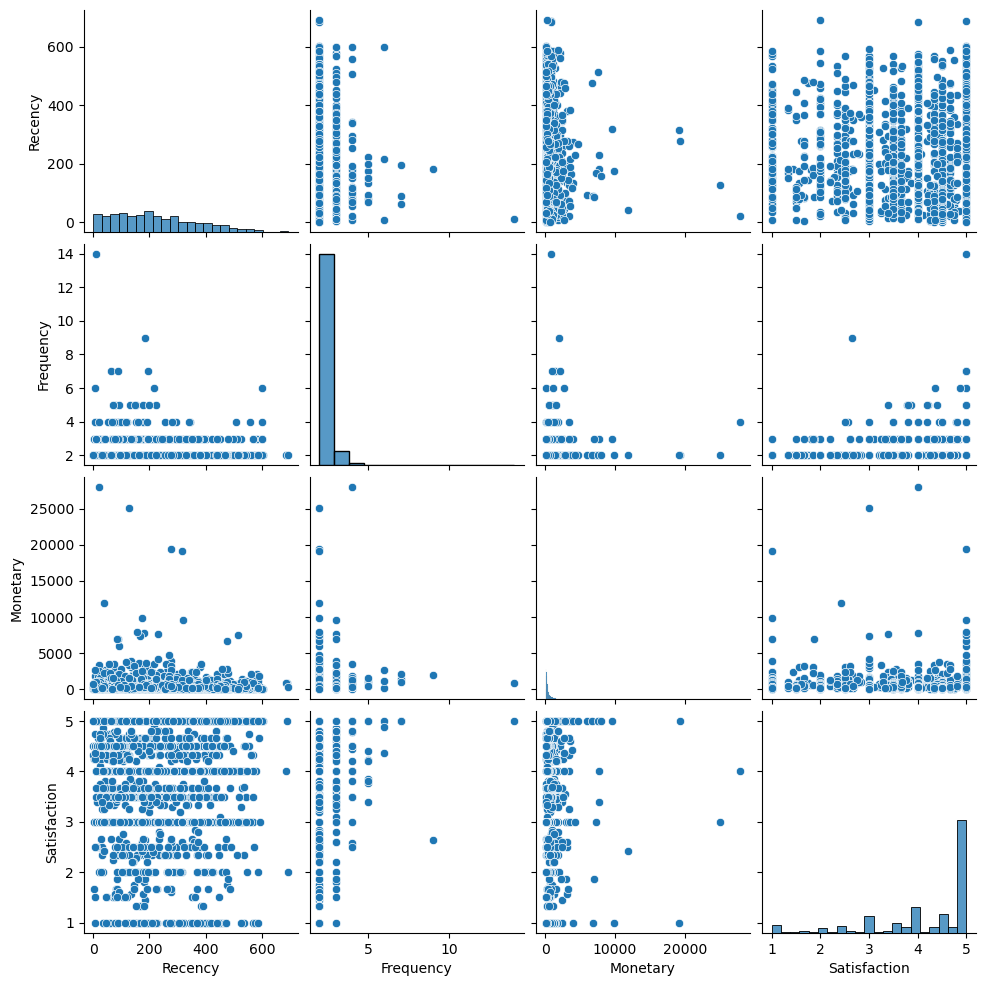

In [57]:
# Les clients qui ont commandé plus de 2 fois
rfm_premium = rfm_data[(rfm_data['Frequency'] > 1)]

# Création du graphique RFM
sns.pairplot(rfm_premium)

# Ajout de titres et étiquettes
plt.xlabel('Récence (jours)')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

<Axes: >

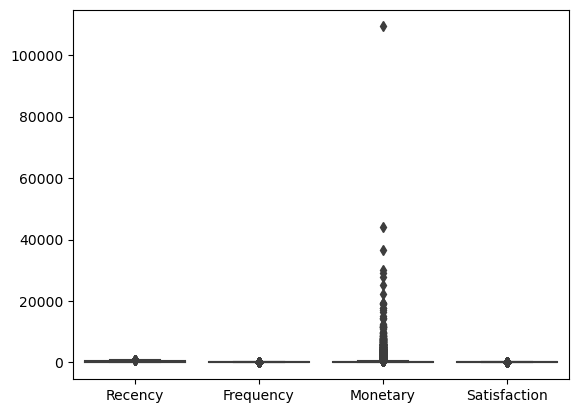

In [58]:
sns.boxplot(rfm_data)

**COMMENTAIRE** 

On remarque des valeurs "extrêmes", on va les regarder de plus près afin de voir si ce sont des outliers.

## RFM Outliers

In [59]:
# Monetary x Recency

# Affichage des valeurs que l'on pense être des Outliers
display(rfm_premium[['Monetary','Recency']].sort_values(by='Monetary', ascending=False).head())

# On regarde les customer dans data_customers afin de comprendre les valeurs
display(data_customers[data_customers['customer_unique_id'] == '0a0a92112bd4c708ca5fde585afaa872'])
display(data_customers[data_customers['customer_unique_id'] == 'da122df9eeddfedc1dc1f5349a1a690c'])
display(data_customers[data_customers['customer_unique_id'] == 'c402f431464c72e27330a67f7b94d4fb'])

,Monetary,Recency
customer_unique_id,,
c8460e4251689ba205045f3ea17884a1,27935.46,21
eae0a83d752b1dd32697e0e7b4221656,25051.89,126
0f5ac8d5c31de21d2f25e24be15bbffb,19342.26,276
d97b3cfb22b0d6b25ac9ed4e9c2d481b,19167.26,316
906a8a4ec9f3d4c3e64fa6d1c4fe6009,11881.01,40


,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
26789,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26790,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26791,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26792,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26793,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26794,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26795,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08
26796,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,1680.0,credit_card,13664.08,1,delivered,2017-10-02 15:28:20,2017-10-17 18:22:29,telefonia_fixa,3.0,2493.0,0a0a92112bd4c708ca5fde585afaa872,RJ,15,13664.08


,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
100175,8ea7aebc18842332aad5f41ca74b334c,3ecf69ee1fe21cfd40b30cbea549e563,2589.0,credit_card,2621.29,5,delivered,2017-04-03 13:25:19,2017-04-17 14:36:23,eletroportateis,1.0,3564.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,14,1310.645
107980,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,4799.0,credit_card,4950.34,5,delivered,2017-04-03 13:25:18,2017-04-17 11:04:45,eletroportateis,2.0,1780.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,13,2475.170


,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
38084,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38085,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38086,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38087,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38088,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38089,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38090,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38091,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38092,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4
38093,1b15974a0141d54e36626dca3fdc731a,ee3d532c8a438679776d222e997606b3,100.0,boleto,2202.4,1,delivered,2018-02-24 03:20:27,2018-03-05 15:22:27,informatica_acessorios,1.0,452.0,c402f431464c72e27330a67f7b94d4fb,SP,9,2202.4


**COMMENTAIRE**

On remarque que le paiement value est très supérieur au prix du produit. Il s'agit surement d'une erreur.

On corrigera en créant une fonction qui remplace le paiement value par le prix quand le paiement value dépasse de 2 fois le prix (cela permet de garder une marge d'erreur comme pour les frais d'envoi ou autre))

In [60]:
def outlier_monetary (data_customers) :
    mask = data_customers['payment_value'] > (data_customers['price'] * 2)
    data_customers.loc[mask, 'payment_value'] = data_customers['price']
    return data_customers

In [61]:
display(outlier_monetary(data_customers).head())

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48,cool_stuff,4.0,598.0,871766c5855e863f6eccc05f988b23cb,RJ,7,72.19
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,boleto,73.86,5,delivered,2017-06-29 02:44:11,2017-07-13 20:39:29,cool_stuff,4.0,598.0,0fb8e3eab2d3e79d92bb3fffbb97f188,GO,14,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,credit_card,83.23,4,delivered,2018-05-18 12:31:43,2018-06-04 18:34:26,cool_stuff,4.0,598.0,3419052c8c6b45daf79c1e426f9e9bcb,MG,17,83.23
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,75.07,5,delivered,2017-08-01 18:55:08,2017-08-09 21:26:33,cool_stuff,4.0,598.0,e7c828d22c0682c1565252deefbe334d,PR,8,75.07
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-08-10 22:05:11,2017-08-24 20:04:21,cool_stuff,4.0,598.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,MG,13,72.19


In [62]:
rfm_temp = rfm(data_customers, snapshot_date)
display(rfm_temp.head())

,Recency,Frequency,Monetary,Satisfaction
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0


In [63]:
# On met à jour RFM
rfm = rfm(data_customers, snapshot_date)
display(rfm.head())

,Recency,Frequency,Monetary,Satisfaction
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0


In [64]:
rfm_data = rfm_temp

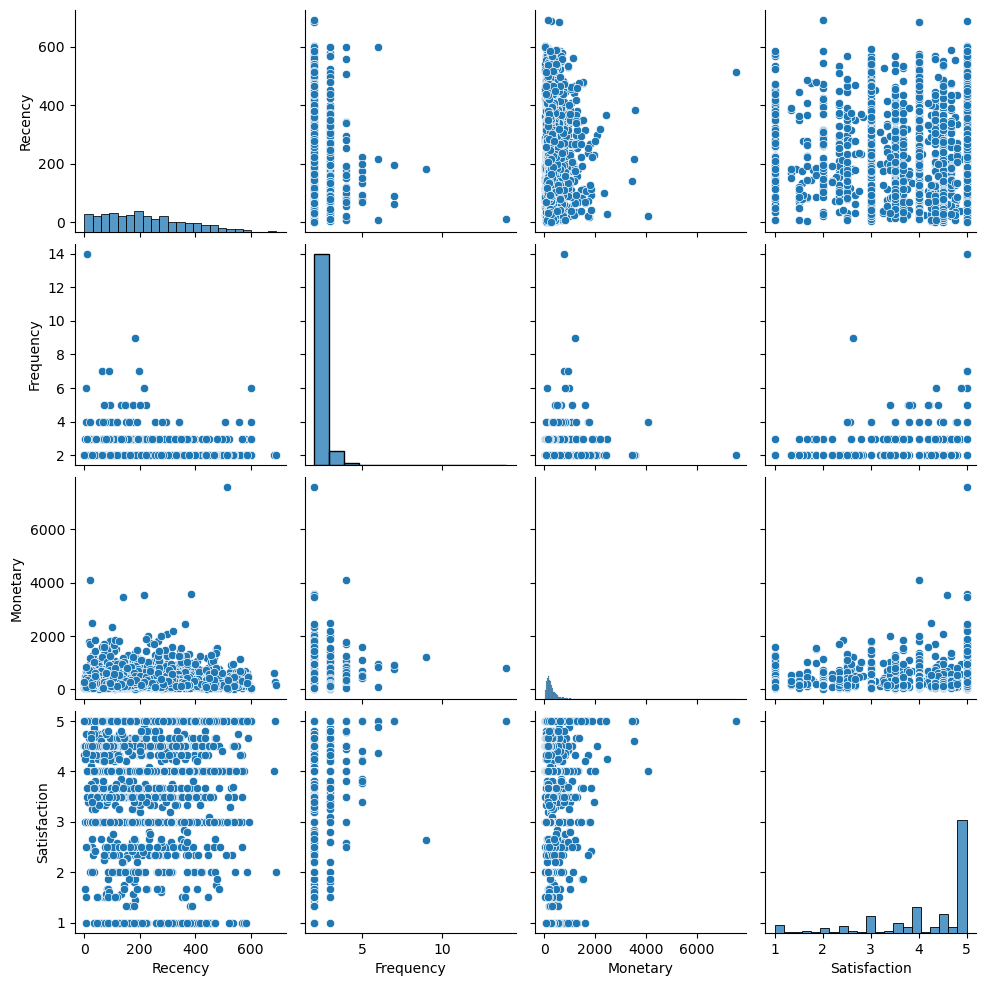

In [65]:
# On regarde de nouveau le pairplot des clients qui ont commandé 2 fois et plus

# Les clients qui ont commandé plus de 2 fois
rfm_premium = rfm_data[(rfm_data['Frequency'] > 1)]

# Création du graphique RFM
sns.pairplot(rfm_premium)

# Ajout de titres et étiquettes
plt.xlabel('Récence (jours)')
plt.ylabel('Fréquence')

# Affichage du graphique
plt.show()

**COMMENTAIRE**

Il reste une valeur extrême dans le pairplot, regardons :

In [66]:
display(rfm_premium[['Monetary', 'Recency']].sort_values(by='Monetary', ascending=False).head())

,Monetary,Recency
customer_unique_id,,
da122df9eeddfedc1dc1f5349a1a690c,7571.63,514
c8460e4251689ba205045f3ea17884a1,4080.00,21
59d66d72939bc9497e19d89c61a96d5f,3559.99,384
66f4eec9da64df09009a7f397c2a32b1,3528.47,217
6ddbc64bd04d40f7768ff088d94cbeb8,3449.49,141


In [67]:
display(data_customers[data_customers['customer_unique_id']=='da122df9eeddfedc1dc1f5349a1a690c'])

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
100175,8ea7aebc18842332aad5f41ca74b334c,3ecf69ee1fe21cfd40b30cbea549e563,2589.0,credit_card,2621.29,5,delivered,2017-04-03 13:25:19,2017-04-17 14:36:23,eletroportateis,1.0,3564.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,14,1310.645
107980,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,4799.0,credit_card,4950.34,5,delivered,2017-04-03 13:25:18,2017-04-17 11:04:45,eletroportateis,2.0,1780.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,13,2475.170


Regardons le boxplot de cette catégorie de produit afin de voir si c'est cohérent.

<function matplotlib.pyplot.show(close=None, block=None)>

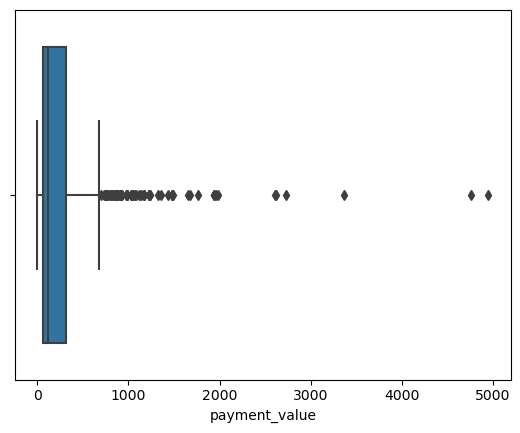

In [68]:
filtered_data = data_customers[data_customers['product_category_name'] == 'eletroportateis']
sns.boxplot(x=filtered_data['payment_value'])
plt.show

In [69]:
display(filtered_data.sort_values(by='payment_value', ascending=False).head(10))

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
107980,a96610ab360d42a2e5335a3998b4718a,a6492cc69376c469ab6f61d8f44de961,4799.00,credit_card,4950.34,5,delivered,2017-04-03 13:25:18,2017-04-17 11:04:45,eletroportateis,2.0,1780.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,13,2475.170
63627,199af31afc78c699f0dbf71fb178d4d4,c3ed642d592594bb648ff4a04cee2747,4690.00,credit_card,4764.34,4,delivered,2017-04-19 15:50:15,2017-05-07 10:42:39,eletroportateis,2.0,2217.0,eebb5dda148d3893cdaf5b5ca3040ccb,SP,17,4764.340
101780,80dfedb6d17bf23539beeef3c768f4d7,4ca7b91a31637bd24fb8e559d5e015e4,3999.00,credit_card,3360.66,2,delivered,2017-04-18 20:50:13,2017-05-04 14:13:36,eletroportateis,5.0,2209.0,edf81e1f3070b9dac83ec83dacdbb9bc,DF,15,3360.660
100176,afc58387b17fa794fd73b0773a9f6ea7,3ecf69ee1fe21cfd40b30cbea549e563,2690.00,boleto,2734.11,1,delivered,2017-06-19 06:35:26,2017-07-06 16:48:41,eletroportateis,1.0,3564.0,149b43a4776ea0a773ac75bc58830fb9,CE,17,2734.110
100175,8ea7aebc18842332aad5f41ca74b334c,3ecf69ee1fe21cfd40b30cbea549e563,2589.00,credit_card,2621.29,5,delivered,2017-04-03 13:25:19,2017-04-17 14:36:23,eletroportateis,1.0,3564.0,da122df9eeddfedc1dc1f5349a1a690c,RJ,14,1310.645
100174,78ce53a063eb2907f9727aac2c678339,3ecf69ee1fe21cfd40b30cbea549e563,2589.00,credit_card,2606.01,4,delivered,2017-04-06 21:22:51,2017-04-13 14:38:33,eletroportateis,1.0,3564.0,7814db11654d2bf3b43bae828b6eee05,SP,6,2606.010
34599,06375e8bcbe64fb1da3b499fa42a7991,218bdd5d01fa000018c777fcc2bbfebd,1899.05,boleto,1981.22,5,delivered,2018-02-28 09:56:07,2018-03-15 17:42:32,eletroportateis,2.0,1384.0,237beb4b0ae00c80268b9b894ed3f65a,PR,15,1981.220
108193,cb578e3b649e02ffe6afd3eb778d6370,b7d35019c9f8e0eeff52b36a59eec8e8,1890.00,credit_card,1963.97,4,delivered,2017-09-14 04:32:38,2017-09-26 21:48:53,eletroportateis,4.0,1654.0,a1bd814d14be56675c1201a1a28a6e64,MG,12,1963.970
67061,437f5369f126238624d421f44b3eb1db,10558db20f88e2b71f8dff4614f9e3bf,1890.00,boleto,1938.74,5,delivered,2017-06-20 06:36:13,2017-06-26 13:52:08,eletroportateis,2.0,1750.0,9410c05c403cf6b73c071fa50c8ae641,SP,6,1938.740
108192,ab036b681f93c56caee93990cecf22ce,b7d35019c9f8e0eeff52b36a59eec8e8,1890.00,boleto,1936.50,5,delivered,2017-09-19 03:45:12,2017-09-26 18:56:01,eletroportateis,4.0,1654.0,b8ca2e14188d8a3ebd2da5dfccb5725d,SP,7,1936.500


**COMMENTAIRE**

On ne considère pas data_customers['customer_unique_id']=='da122df9eeddfedc1dc1f5349a1a690c'] comme un outlier.

## RFM avec quantile

- Si l'objectif est de créer des segments facilement actionnables pour des campagnes marketing, des quantiles plus larges (comme les quartiles) peuvent suffire.

- Si l'objectif est de réaliser une analyse approfondie et de comprendre des différences subtiles dans les comportements des clients, des quantiles plus petits (comme les déciles) peuvent être plus appropriés.

In [70]:
# Définir les labels pour les quantiles
r_labels = f_labels = m_labels = [1, 2, 3, 4, 5]

# Créer les scores pour la récence, la fréquence et la valeur monétaire
rfm['R'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm['M'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

display(rfm.head())

,Recency,Frequency,Monetary,Satisfaction,R,F,M
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0,2,1,4
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,2,1,1
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,5,1,3
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,4,1,1
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,4,1,4


In [71]:
# Combiner les scores R, F et M en une seule chaîne
rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

display(rfm.head())

,Recency,Frequency,Monetary,Satisfaction,R,F,M,RFM_Score
customer_unique_id,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0,2,1,4,214
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,2,1,1,211
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,5,1,3,513
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,4,1,1,411
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,4,1,4,414


In [72]:
def segment_customers(df):
    if df['RFM_Score'] == '555':
        return 'Top Customers'
    elif df['RFM_Score'].startswith('5'):
        return 'Loyal Customers'
    elif df['RFM_Score'].endswith('5'):
        return 'Big Spenders'
    elif df['R'] <= 2:
        return 'At Risk'
    else:
        return 'Others'

In [73]:
rfm['Segment'] = rfm.apply(segment_customers, axis=1)

display(rfm.head())

,Recency,Frequency,Monetary,Satisfaction,R,F,M,RFM_Score,Segment
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0,2,1,4,214,At Risk
0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,2,1,1,211,At Risk
0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,5,1,3,513,Loyal Customers
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,4,1,1,411,Others
0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,4,1,4,414,Others


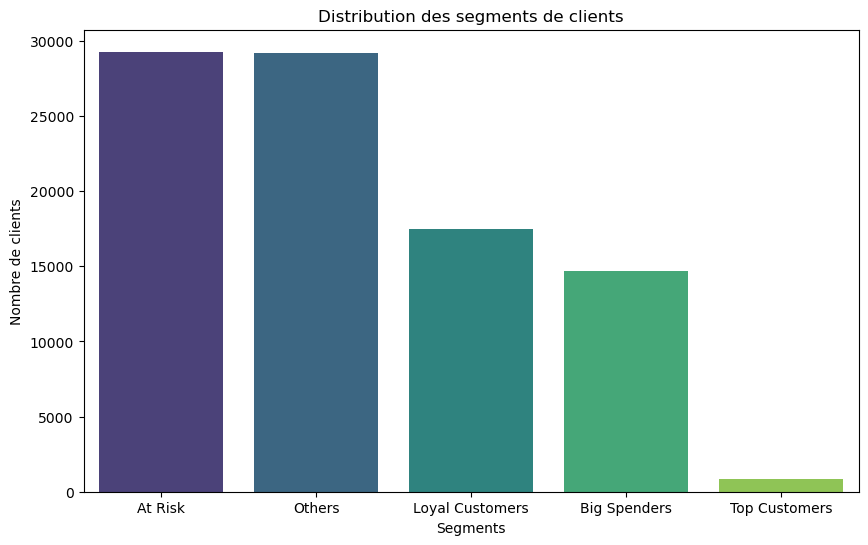

In [74]:
# Compter le nombre de clients dans chaque segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=False)

# Tracer la distribution des segments
plt.figure(figsize=(10, 6))
sns.barplot(x=segments_counts.index, y=segments_counts.values, palette='viridis')
plt.title('Distribution des segments de clients')
plt.xlabel('Segments')
plt.ylabel('Nombre de clients')
plt.show()

# Export

In [75]:
display(data_customers.head())

,order_id,product_id,price,payment_type,payment_value,review_score,order_status,order_approved_at,order_delivered_customer_date,product_category_name,product_photos_qty,product_description_lenght,customer_unique_id,customer_state,order_delivered_days,panier_moyen
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-09-13 09:45:35,2017-09-20 23:43:48,cool_stuff,4.0,598.0,871766c5855e863f6eccc05f988b23cb,RJ,7,72.19
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,boleto,73.86,5,delivered,2017-06-29 02:44:11,2017-07-13 20:39:29,cool_stuff,4.0,598.0,0fb8e3eab2d3e79d92bb3fffbb97f188,GO,14,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,credit_card,83.23,4,delivered,2018-05-18 12:31:43,2018-06-04 18:34:26,cool_stuff,4.0,598.0,3419052c8c6b45daf79c1e426f9e9bcb,MG,17,83.23
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,75.07,5,delivered,2017-08-01 18:55:08,2017-08-09 21:26:33,cool_stuff,4.0,598.0,e7c828d22c0682c1565252deefbe334d,PR,8,75.07
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,credit_card,72.19,5,delivered,2017-08-10 22:05:11,2017-08-24 20:04:21,cool_stuff,4.0,598.0,0bb98ba72dcc08e95f9d8cc434e9a2cc,MG,13,72.19


In [76]:
# Export to CSV
data_customers_unique.to_csv('data_customers_unique.csv', index=True)

In [77]:
# Export RFM
rfm_data.to_csv('rfm.csv', index=True)

In [78]:
# Export data_customers
data_customers.to_csv('data_customers.csv', index=False)